In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.svm import SVC

In [2]:
#Read csv
data = pd.read_csv("wdbc_data.csv", header=None)
df = pd.DataFrame(data)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
#Drop first column (ID number)
df = df.drop(0, axis=1)

In [6]:
#Change diagnosis values M to 1 and B to -1
df[1] = df[1].map({'M':1,'B':-1})

In [7]:
df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-0.254833,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.967836,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,-1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,-1.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,-1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#Label names from wdbc_names.txt
label_names = np.array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [10]:
#Split the data
X = df.drop(1, axis=1)
y = df[1]

print(X.shape)
print(y.shape)

(569, 30)
(569,)


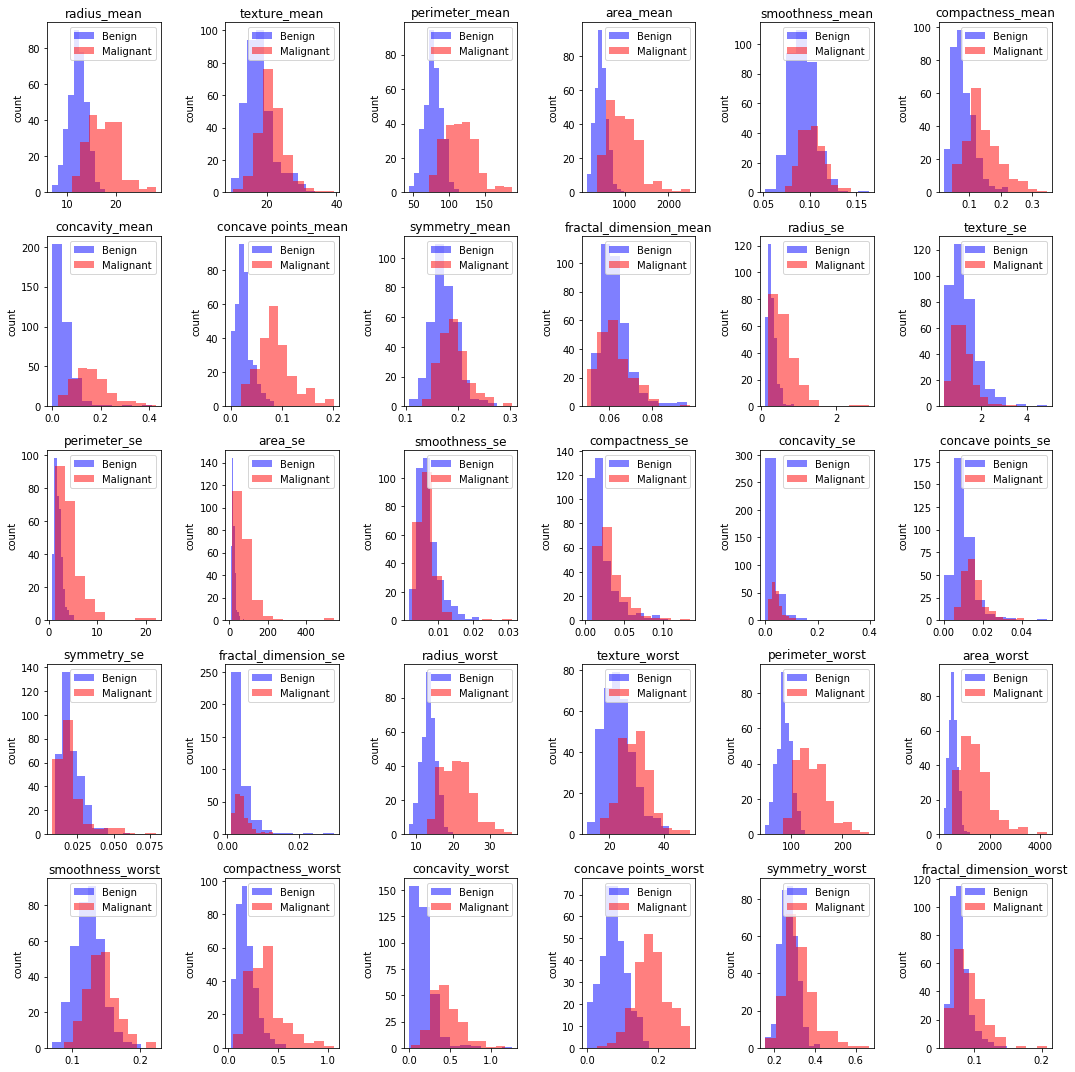

In [11]:
#Plotting the data
fig, ax = plt.subplots(5,6, figsize=(15,15))
ax = ax.flatten()

for i, column in enumerate(X.columns):
    x1 = df[(df[1] == -1)][column]
    x2 = df[(df[1] == 1)][column]

    ax[i].hist(x1, color='blue', alpha=0.5, label='Benign')
    ax[i].hist(x2, color='red', alpha=0.5, label='Malignant')
    
    ax[i].set_title(label_names[i+1])
    ax[i].set_ylabel('count')
    ax[i].legend(loc='best')

fig.tight_layout()

In [12]:
#Benign vs Malignant counts
print(df.groupby(1).size())

1
-1    357
 1    212
dtype: int64


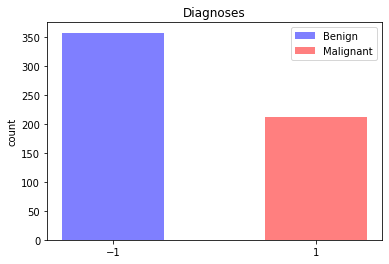

In [13]:
#Plot diagnosis counts
fig, ax = plt.subplots()

x1 = df[(df[1] == -1)][1]
x2 = df[(df[1] == 1)][1]

ax.hist(x1, color='blue', alpha=0.5, bins=1, label='Benign')
ax.hist(x2, color='red', alpha=0.5, bins=1, label='Malignant')
    
ax.set_title('Diagnoses')
ax.set_ylabel('count')
ax.legend(loc='best')
plt.xticks([-1, 1])

plt.show()

In [14]:
#Split into training and test sets
X_train = X[:300]
X_test = X[300:]
y_train = y[:300]
y_test = y[300:]

In [15]:
#Make predictions with decision stumps (decision trees of depth 1)
decision_stump = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=1, max_leaf_nodes=2)
stump = decision_stump.fit(X_train, y_train)
y_predict = stump.predict(X_test)

In [16]:
#Prediction results of decision stumps
print('Confusion matrix:')
print(confusion_matrix(y_test, y_predict))
score = accuracy_score(y_test, y_predict)
print('Accuracy score:', score)

Confusion matrix:
[[185  18]
 [  4  62]]
Accuracy score: 0.9182156133828996


In [17]:
#Create class
class AdaBoost:
    def __init__(self):
        self.h = None
        self.alpha = None
        self.errors = None
        self.weights = None

In [18]:
#Function to fit AdaBoosted model
train_acc = list()
err_list = list()
def fit(self, X, y, n_iterations):
    #Initialise
    n = X.shape[0]
    self.h = np.zeros(shape=n_iterations, dtype=object)
    self.alpha = np.zeros((n_iterations))
    self.errors = np.zeros((n_iterations))
    self.weights = np.zeros((n_iterations, n))
    self.weights[0] = np.ones((n)) / n
    
    for t in range(n_iterations):
        #Fit decision stump (weak learner)
        current_weights = self.weights[t]
        stump = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=1, max_leaf_nodes=2)
        stump = stump.fit(X, y, current_weights)
        h_pred = stump.predict(X)
        
        #Calculate error and alpha        
        err = current_weights[(h_pred != y)].sum()
        alpha_t = np.log((1 - err) / err) * 0.5

        #Update weights, h, alpha and errors
        new_weights = current_weights * np.exp(-alpha_t * y * h_pred)
        new_weights /= new_weights.sum()
        if t+1 < n_iterations:
            self.weights[t+1] = new_weights
        self.h[t] = stump
        self.alpha[t] = alpha_t
        self.errors[t] = err
        train_acc.append(accuracy_score(y_train, h_pred))
        err_list.append(err)
                
    return self

In [19]:
#Prediction function
def predict(self, X):
    predictions = np.array([stump.predict(X) for stump in self.h])
    return np.sign(np.dot(self.alpha, predictions))

In [20]:
#Assign classifier functions
AdaBoost.fit = fit
AdaBoost.predict = predict

#Train and predict
ada = AdaBoost().fit(X_train, y_train, n_iterations=600)
acc = (ada.predict(X_test) == y_test).mean()

#Prediction results
print('Confusion matrix:')
print(confusion_matrix(y_test, ada.predict(X_test)))
print('Test Accuracy: ', acc)

Confusion matrix:
[[197   6]
 [  1  65]]
Test Accuracy:  0.9739776951672863


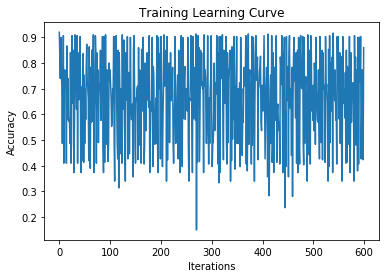

In [21]:
#Plot training learning curve
plt.plot(train_acc)
plt.title('Training Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

plt.show()

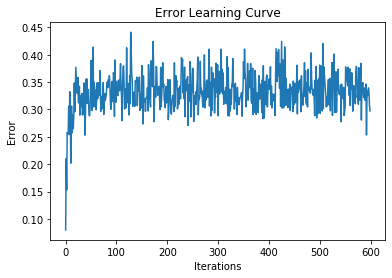

In [22]:
#Plot error learning curve
plt.plot(err_list)
plt.title('Error Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Error')

plt.show()

In [23]:
#Using inbuilt package AdaBoost classifier from sklearn
sk_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500)
sk_ada.fit(X_train, y_train)
acc_inbuilt = (sk_ada.predict(X_test) == y_test).mean()
print('Inbuilt AdaBoost Accuracy: ', acc_inbuilt)

Inbuilt AdaBoost Accuracy:  0.9814126394052045


In [24]:
#Comparing with inbuilt package of SVM from sklearn
svc = SVC(C=0.1, kernel='rbf', gamma='scale')
svc = svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print('Inbuilt SVM Accuracy: ', accuracy_score(svc_predict, y_test))

Inbuilt SVM Accuracy:  0.9516728624535316
